# Persistence Images

Persistence Images were first introduced in [Adams et al, 2017](http://www.jmlr.org/papers/volume18/16-337/16-337.pdf). Much of this work, an examples contained herein are inspired by the work of [Obayashi and Hiraoka, 2017](https://arxiv.org/abs/1706.10082). Choices of weightings and general methods are often derived from [Kusano, Fukumizu, and Yasuaki Hiraoka, 2016](https://arxiv.org/abs/1601.01741).

In [1]:
from itertools import product

import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage

## Generate persistence diagram using Ripser

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, verbose=True)


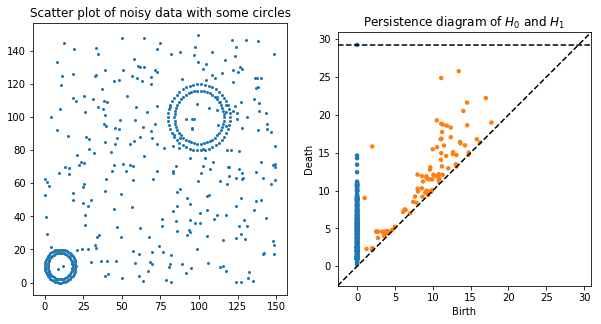

In [2]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)), 
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

## Persistence Images with various pixels

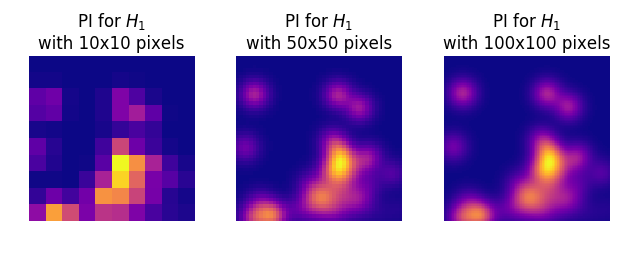

In [3]:
pim = PersImage(spread=1, pixels=[10,10], verbose=False)
img = pim.transform(dgms[1])

ax = plt.subplot(131)
plt.title("PI for $H_1$\nwith 10x10 pixels")
pim.show(img, ax)

pim = PersImage(spread=1, pixels=[50,50], verbose=False)
img = pim.transform(dgms[1])

ax = plt.subplot(132)
plt.title("PI for $H_1$\nwith 50x50 pixels")
pim.show(img, ax)

pim = PersImage(spread=1, pixels=[100,100], verbose=False)
img = pim.transform(dgms[1])

ax = plt.subplot(133)
plt.title("PI for $H_1$\nwith 100x100 pixels")
pim.show(img, ax)

plt.tight_layout()

## Various levels of spread

Spread determines the standard deviate of the Gaussian kernel used. 

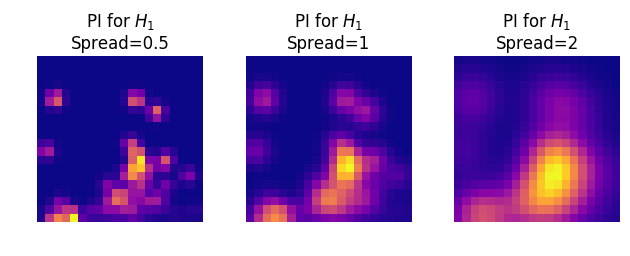

In [4]:
pim = PersImage(spread=0.5, verbose=False)
img = pim.transform(dgms[1])

ax = plt.subplot(131)
plt.title("PI for $H_1$\nSpread=0.5")
pim.show(img, ax)

pim = PersImage(spread=1, verbose=False)
img = pim.transform(dgms[1])

ax = plt.subplot(132)
plt.title("PI for $H_1$\nSpread=1")
pim.show(img, ax)

pim = PersImage(spread=2, verbose=False)
img = pim.transform(dgms[1])

ax = plt.subplot(133)
plt.title("PI for $H_1$\nSpread=2")
pim.show(img, ax)

plt.tight_layout()

## Particular ranges

Say you want to directly compare a new set of persistence images with an older set. You can specify the range of the grid using the `specs` parameter.

To access the specs of another PersImage object, either automatically generated or defined, you can read the `.specs` attribute. This is shown below.

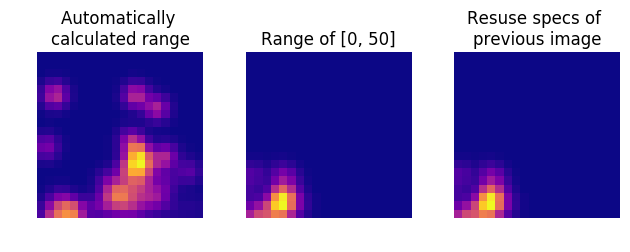

In [5]:
pim1 = PersImage(verbose=False)
img1 = pim1.transform(dgms[1])

pim2 = PersImage(specs={"minBD": 0, "maxBD": 50}, verbose=False)
img2 = pim2.transform(dgms[1])

# Use calculated specs from previous image
specs2 = pim2.specs
pim3 = PersImage(specs=specs2, verbose=False)
img3 = pim3.transform(dgms[1])

ax = plt.subplot(131)
plt.title("Automatically \ncalculated range")
pim.show(img1, ax)

ax = plt.subplot(132)
plt.title("Range of [0, 50]")
pim.show(img2, ax)

ax = plt.subplot(133)
plt.title("Resuse specs of \nprevious image")
pim.show(img3, ax)

plt.tight_layout()